# Part 1: Original code

1. Run the tutorial code out of the box and make sure you get reasonable results. You will report these results in Section 4, so no report needed here.

This is the original code on website: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py

Files already downloaded and verified
Files already downloaded and verified
 frog truck  ship  deer
[1,  2000] loss: 2.216
[1,  4000] loss: 1.863
[1,  6000] loss: 1.678
[1,  8000] loss: 1.604
[1, 10000] loss: 1.536
[1, 12000] loss: 1.493
[2,  2000] loss: 1.418
[2,  4000] loss: 1.394
[2,  6000] loss: 1.369
[2,  8000] loss: 1.338
[2, 10000] loss: 1.314
[2, 12000] loss: 1.296
Finished Training
GroundTruth:    cat  ship  ship plane
Predicted:    cat  ship  ship  ship
Accuracy of the network on the 10000 test images: 53 %
Accuracy of plane : 46 %
Accuracy of   car : 50 %
Accuracy of  bird : 40 %
Accuracy of   cat : 34 %
Accuracy of  deer : 59 %
Accuracy of   dog : 36 %
Accuracy of  frog : 64 %
Accuracy of horse : 48 %
Accuracy of  ship : 88 %
Accuracy of truck : 61 %
cpu


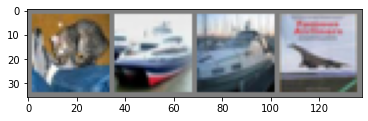

In [1]:
# -*- coding: utf-8 -*-
# """
# Training a Classifier
# =====================

# This is it. You have seen how to define neural networks, compute loss and make
# updates to the weights of the network.

# Now you might be thinking,

# What about data?
# ----------------

# Generally, when you have to deal with image, text, audio or video data,
# you can use standard python packages that load data into a numpy array.
# Then you can convert this array into a ``torch.*Tensor``.

# -  For images, packages such as Pillow, OpenCV are useful
# -  For audio, packages such as scipy and librosa
# -  For text, either raw Python or Cython based loading, or NLTK and
#    SpaCy are useful

# Specifically for vision, we have created a package called
# ``torchvision``, that has data loaders for common datasets such as
# Imagenet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
# ``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

# This provides a huge convenience and avoids writing boilerplate code.

# For this tutorial, we will use the CIFAR10 dataset.
# It has the classes: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’,
# ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. The images in CIFAR-10 are of
# size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size.

# .. figure:: /_static/img/cifar10.png
#    :alt: cifar10

#    cifar10


# Training an image classifier
# ----------------------------

# We will do the following steps in order:

# 1. Load and normalizing the CIFAR10 training and test datasets using
#    ``torchvision``
# 2. Define a Convolution Neural Network
# 3. Define a loss function
# 4. Train the network on the training data
# 5. Test the network on the test data

# 1. Loading and normalizing CIFAR10
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Using ``torchvision``, it’s extremely easy to load CIFAR10.
# """
import torch
import torchvision
import torchvision.transforms as transforms

########################################################################
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

########################################################################
# Let us show some of the training images, for fun.

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))


########################################################################
# 2. Define a Convolution Neural Network
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Copy the neural network from the Neural Networks section before and modify it to
# take 3-channel images (instead of 1-channel images as it was defined).

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

########################################################################
# 3. Define a Loss function and optimizer
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Let's use a Classification Cross-Entropy loss and SGD with momentum.

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

########################################################################
# 4. Train the network
# ^^^^^^^^^^^^^^^^^^^^
#
# This is when things start to get interesting.
# We simply have to loop over our data iterator, and feed the inputs to the
# network and optimize.

for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

########################################################################
# 5. Test the network on the test data
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
#
# We have trained the network for 2 passes over the training dataset.
# But we need to check if the network has learnt anything at all.
#
# We will check this by predicting the class label that the neural network
# outputs, and checking it against the ground-truth. If the prediction is
# correct, we add the sample to the list of correct predictions.
#
# Okay, first step. Let us display an image from the test set to get familiar.

dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

########################################################################
# Okay, now let us see what the neural network thinks these examples above are:

outputs = net(images)

########################################################################
# The outputs are energies for the 10 classes.
# Higher the energy for a class, the more the network
# thinks that the image is of the particular class.
# So, let's get the index of the highest energy:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

########################################################################
# The results seem pretty good.
#
# Let us look at how the network performs on the whole dataset.

correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

########################################################################
# That looks waaay better than chance, which is 10% accuracy (randomly picking
# a class out of 10 classes).
# Seems like the network learnt something.
#
# Hmmm, what are the classes that performed well, and the classes that did
# not perform well:

class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

########################################################################
# Okay, so what next?
#
# How do we run these neural networks on the GPU?
#
# Training on GPU
# ----------------
# Just like how you transfer a Tensor on to the GPU, you transfer the neural
# net onto the GPU.
#
# Let's first define our device as the first visible cuda device if we have
# CUDA available:

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Assume that we are on a CUDA machine, then this should print a CUDA device:

print(device)

########################################################################
# The rest of this section assumes that `device` is a CUDA device.
#
# Then these methods will recursively go over all modules and convert their
# parameters and buffers to CUDA tensors:
#
# .. code:: python
#
#     net.to(device)
#
#
# Remember that you will have to send the inputs and targets at every step
# to the GPU too:
#
# .. code:: python
#
#         inputs, labels = inputs.to(device), labels.to(device)
#
# Why dont I notice MASSIVE speedup compared to CPU? Because your network
# is realllly small.
#
# **Exercise:** Try increasing the width of your network (argument 2 of
# the first ``nn.Conv2d``, and argument 1 of the second ``nn.Conv2d`` –
# they need to be the same number), see what kind of speedup you get.
#
# **Goals achieved**:
#
# - Understanding PyTorch's Tensor library and neural networks at a high level.
# - Train a small neural network to classify images
#
# Training on multiple GPUs
# -------------------------
# If you want to see even more MASSIVE speedup using all of your GPUs,
# please check out :doc:`data_parallel_tutorial`.
#
# Where do I go next?
# -------------------
#
# -  :doc:`Train neural nets to play video games </intermediate/reinforcement_q_learning>`
# -  `Train a state-of-the-art ResNet network on imagenet`_
# -  `Train a face generator using Generative Adversarial Networks`_
# -  `Train a word-level language model using Recurrent LSTM networks`_
# -  `More examples`_
# -  `More tutorials`_
# -  `Discuss PyTorch on the Forums`_
# -  `Chat with other users on Slack`_
#
# .. _Train a state-of-the-art ResNet network on imagenet: https://github.com/pytorch/examples/tree/master/imagenet
# .. _Train a face generator using Generative Adversarial Networks: https://github.com/pytorch/examples/tree/master/dcgan
# .. _Train a word-level language model using Recurrent LSTM networks: https://github.com/pytorch/examples/tree/master/word_language_model
# .. _More examples: https://github.com/pytorch/examples
# .. _More tutorials: https://github.com/pytorch/tutorials
# .. _Discuss PyTorch on the Forums: https://discuss.pytorch.org/
# .. _Chat with other users on Slack: http://pytorch.slack.com/messages/beginner/


# Part 2: Single fully connected layer/Number of parameters

2. Change the code to have only a single fully connected layer. The model will have a single layer that connects the input to the output. What is the number of parameters? In PyTorch, ”nn.Linear” can be used for fully connected layer.

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.170
[1,  4000] loss: 2.172
[1,  6000] loss: 2.179
[1,  8000] loss: 2.149
[1, 10000] loss: 2.149
[1, 12000] loss: 2.142
[2,  2000] loss: 2.045
[2,  4000] loss: 2.091
[2,  6000] loss: 2.088
[2,  8000] loss: 2.130
[2, 10000] loss: 2.140
[2, 12000] loss: 2.124
[3,  2000] loss: 2.038
[3,  4000] loss: 2.044
[3,  6000] loss: 2.089
[3,  8000] loss: 2.098
[3, 10000] loss: 2.087
[3, 12000] loss: 2.131
[4,  2000] loss: 2.028
[4,  4000] loss: 2.044
[4,  6000] loss: 2.094
[4,  8000] loss: 2.081
[4, 10000] loss: 2.077
[4, 12000] loss: 2.091
[5,  2000] loss: 2.045
[5,  4000] loss: 2.040
[5,  6000] loss: 2.049
[5,  8000] loss: 2.051
[5, 10000] loss: 2.109
[5, 12000] loss: 2.086
[6,  2000] loss: 1.995
[6,  4000] loss: 2.040
[6,  6000] loss: 2.065
[6,  8000] loss: 2.038
[6, 10000] loss: 2.052
[6, 12000] loss: 2.116
[7,  2000] loss: 2.007
[7,  4000] loss: 2.032
[7,  6000] loss: 2.037
[7,  8000] loss: 2.052
[7, 

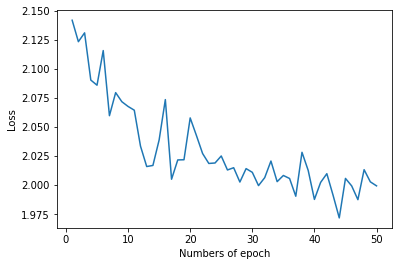

Plot test accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Test Accuracy: [0.3367, 0.3327, 0.3527, 0.3572, 0.3313, 0.3271, 0.3159, 0.3216, 0.3144, 0.3328, 0.3512, 0.3265, 0.3465, 0.3188, 0.3317, 0.3344, 0.3383, 0.3251, 0.3272, 0.3184, 0.3446, 0.3355, 0.3394, 0.3487, 0.3123, 0.3202, 0.3361, 0.354, 0.3363, 0.3345, 0.3318, 0.3359, 0.345, 0.3331, 0.3347, 0.3314, 0.3292, 0.3283, 0.3312, 0.3393, 0.3064, 0.3323, 0.3495, 0.289, 0.3198, 0.3424, 0.3308, 0.3378, 0.3119, 0.3317]


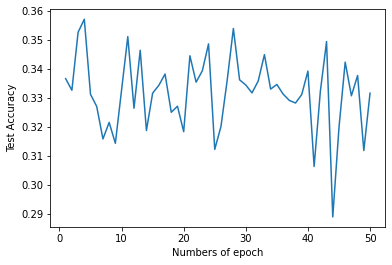

Plot train accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Train Accuracy: [0.35912, 0.3748, 0.3871, 0.38596, 0.36704, 0.36792, 0.36954, 0.36366, 0.36144, 0.38044, 0.40176, 0.37976, 0.39702, 0.36706, 0.38586, 0.3931, 0.4082, 0.38568, 0.38276, 0.3781, 0.39794, 0.39614, 0.40132, 0.41386, 0.3786, 0.38992, 0.40298, 0.41938, 0.40108, 0.39732, 0.40648, 0.40296, 0.41386, 0.40046, 0.39928, 0.40082, 0.393, 0.3957, 0.4003, 0.41266, 0.37774, 0.39972, 0.42498, 0.3505, 0.37504, 0.40308, 0.39466, 0.41402, 0.38426, 0.40406]


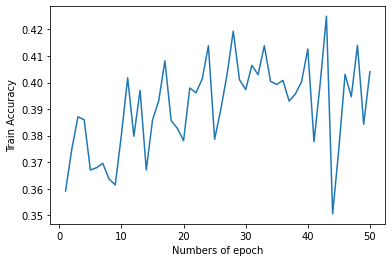

The number of parameters: 30730

(The number of parameters = (current layer c*previous layer p)+1*c)
(32*32*3)*10 + 1*10 = 30730


In [2]:
######################################
# 1. Loading and normalizing CIFAR10
######################################

import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 4

transform = transforms.Compose(
    [transforms.ToTensor(),    #numpy->Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #將數值正規劃到-1~1之間

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    #Download train dataset 50000
                                        download=True, transform=transform)

# batch_size: how many samples per batch to load（每批讀取的image數量）

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)     #Download test dataset 10000

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Show some of the training images

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5      # unnormalize
    npimg = img.numpy()      # tensor -> numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     #改變通道順序


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#########################################
# 2. Define a Convolution Neural Network
#########################################

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3*32*32,10)
        
    def forward(self, x):
        x = x.view(-1, 3*32*32)
        x = self.fc1(x)
        return x

net = Net()

##########################################
# 3. Define a Loss function and optimizer
##########################################

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

########################
# 4. Train the network
########################

EPOCHS = 50

#curve of loss:
epoch_=[]
loss_=[]
epoch_change = False

#test accuracy:
test_acc=[]

#test accuracy:
train_acc=[]


for epoch in range(EPOCHS):  # loop over the dataset multiple times ＃跑完全部data是一個epoch,一次跑batch_size張data

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):    # i=第幾批data
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #train
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches #每2000批印出來
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            
            #save curve of loss
            if epoch_change == False and epoch_ != []:
                epoch_.pop()
                epoch_.append(epoch+1)
                loss_.pop()
                loss_.append(running_loss / 2000)
            else:
                epoch_.append(epoch+1)
                loss_.append(running_loss / 2000)
                epoch_change = False
            
            running_loss = 0.0

    epoch_change = True
      
    #######################################
    # 5. Test the network on the test data
    #######################################

    dataiter = iter(testloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc.append(correct / total)

    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            if labels.shape[0] == BATCH_SIZE:   #若BATCH_SIZE除10000除不盡, 則忽略最後一筆
                for i in range(BATCH_SIZE):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1

                    
    ########################################
    # 6. Test the network on the train data
    ########################################
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    train_acc.append(correct / total)
    
print('Finished Training')

#Plot curve of loss:
from matplotlib import pyplot as plt
print("\nPlot curve of loss:")
plt.plot(epoch_,loss_) 
print("Epoch:",epoch_)
print("Loss:",loss_)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Loss")
plt.show()

#Plot test accuracy:
print("Plot test accuracy:")
plt.plot(epoch_,test_acc) 
print("Epoch:",epoch_)
print("Test Accuracy:",test_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Test Accuracy")
plt.show()

#Plot train accuracy:
print("Plot train accuracy:")
plt.plot(epoch_,train_acc) 
print("Epoch:",epoch_)
print("Train Accuracy:",train_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Train Accuracy")
plt.show()


# The number of parameters

pytorch_total_params = sum(p.numel() for p in net.parameters())
print("The number of parameters:",pytorch_total_params)

print("\n(The number of parameters = (current layer c*previous layer p)+1*c)")
print("(32*32*3)*10 + 1*10 = 30730")

# Part 3: Multiple fully connected layers

3. Change the code to have multiple fully connected layers. Try having a layer from input to 120 neurons and then a layer to 84 neurons, and finally a layer to 10 neurons, one for each category. What happens if you do not use ReLU? Describe why.

Using ReLU:

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 1.926
[1,  4000] loss: 1.715
[1,  6000] loss: 1.665
[1,  8000] loss: 1.612
[1, 10000] loss: 1.585
[1, 12000] loss: 1.542
[2,  2000] loss: 1.455
[2,  4000] loss: 1.490
[2,  6000] loss: 1.452
[2,  8000] loss: 1.460
[2, 10000] loss: 1.455
[2, 12000] loss: 1.448
[3,  2000] loss: 1.363
[3,  4000] loss: 1.356
[3,  6000] loss: 1.380
[3,  8000] loss: 1.382
[3, 10000] loss: 1.372
[3, 12000] loss: 1.373
[4,  2000] loss: 1.268
[4,  4000] loss: 1.314
[4,  6000] loss: 1.302
[4,  8000] loss: 1.302
[4, 10000] loss: 1.305
[4, 12000] loss: 1.344
[5,  2000] loss: 1.225
[5,  4000] loss: 1.240
[5,  6000] loss: 1.253
[5,  8000] loss: 1.245
[5, 10000] loss: 1.258
[5, 12000] loss: 1.286
[6,  2000] loss: 1.200
[6,  4000] loss: 1.211
[6,  6000] loss: 1.188
[6,  8000] loss: 1.214
[6, 10000] loss: 1.212
[6, 12000] loss: 1.221
[7,  2000] loss: 1.149
[7,  4000] loss: 1.138
[7,  6000] loss: 1.170
[7,  8000] loss: 1.183
[7, 

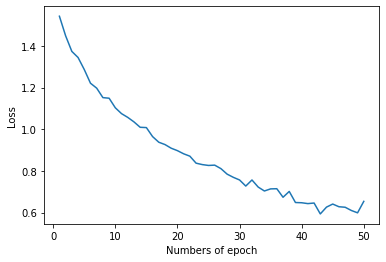

Plot test accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Test Accuracy: [0.4697, 0.4748, 0.484, 0.5067, 0.5069, 0.5185, 0.504, 0.525, 0.5238, 0.5161, 0.5167, 0.5115, 0.512, 0.5096, 0.5078, 0.508, 0.5063, 0.5079, 0.5074, 0.5074, 0.5109, 0.5103, 0.5066, 0.4924, 0.4869, 0.5028, 0.4988, 0.491, 0.4907, 0.5051, 0.4961, 0.4966, 0.5007, 0.5011, 0.4978, 0.4874, 0.497, 0.4919, 0.4986, 0.4872, 0.4894, 0.49, 0.4865, 0.4918, 0.4954, 0.4945, 0.4969, 0.4874, 0.4803, 0.4819]


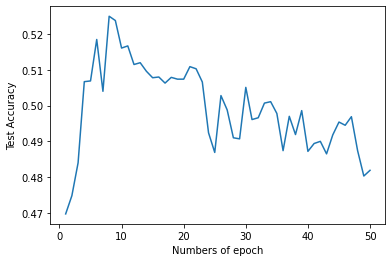

Plot train accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Train Accuracy: [0.48218, 0.51006, 0.52988, 0.56236, 0.57924, 0.60248, 0.60536, 0.62472, 0.64138, 0.64322, 0.6566, 0.6583, 0.66272, 0.68088, 0.68534, 0.69754, 0.69544, 0.69688, 0.70364, 0.72628, 0.73342, 0.73686, 0.73226, 0.72456, 0.72766, 0.75092, 0.75802, 0.75086, 0.75548, 0.77004, 0.75906, 0.77434, 0.779, 0.78398, 0.78532, 0.78278, 0.78342, 0.7903, 0.79296, 0.7874, 0.79478, 0.78848, 0.7879, 0.79858, 0.81256, 0.81788, 0.81354, 0.80832, 0.80612, 0.80936]


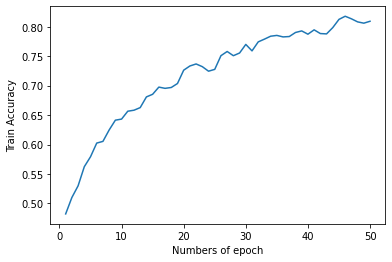

In [3]:
#####################################
# 1. Loading and normalizing CIFAR10
#####################################

import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 4

transform = transforms.Compose(
    [transforms.ToTensor(),    #numpy->Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #將數值正規劃到-1~1之間

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    #Download train dataset 50000
                                        download=True, transform=transform)

# batch_size: how many samples per batch to load（每批讀取的image數量）
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)     #Download test dataset 10000

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# show some of the training images

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5      # unnormalize
    npimg = img.numpy()      # tensor -> numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     #改變通道順序

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#########################################
# 2. Define a Convolution Neural Network
#########################################

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 120)  # 5*5*16=conv2+pool後的大小
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # using ReLU
        x = x.view(-1, 3*32*32)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

##########################################
# 3. Define a Loss function and optimizer
##########################################

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#######################
# 4. Train the network
#######################

EPOCHS = 50

#curve of loss:
epoch_=[]
loss_=[]
epoch_change = False

# test accuracy:
test_acc=[]

#test accuracy:
train_acc=[]

for epoch in range(EPOCHS):  # loop over the dataset multiple times ＃跑完全部data是一個epoch,一次跑batch_size張data

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):    # i=第幾批data
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #train
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches #每2000批印出來
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            
            #curve of loss
            if epoch_change == False and epoch_ != []:
                epoch_.pop()
                epoch_.append(epoch+1)
                loss_.pop()
                loss_.append(running_loss / 2000)
            else:
                epoch_.append(epoch+1)
                loss_.append(running_loss / 2000)
                epoch_change = False
            
            running_loss = 0.0

    epoch_change = True
    
    #######################################
    # 5. Test the network on the test data
    #######################################

    dataiter = iter(testloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc.append(correct / total)

    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            if labels.shape[0] == BATCH_SIZE:   #若BATCH_SIZE除10000除不盡, 則忽略最後一筆
                for i in range(BATCH_SIZE):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1
    
    ########################################
    # 6. Test the network on the train data
    ########################################
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    train_acc.append(correct / total)

print('Finished Training')

#Plot curve of loss:
from matplotlib import pyplot as plt
print("\nPlot curve of loss:")
plt.plot(epoch_,loss_) 
print("Epoch:",epoch_)
print("Loss:",loss_)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Loss")
plt.show()

#Plot test accuracy:
print("Plot test accuracy:")
plt.plot(epoch_,test_acc) 
print("Epoch:",epoch_)
print("Test Accuracy:",test_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Test Accuracy")
plt.show()

#Plot train accuracy:
print("Plot train accuracy:")
plt.plot(epoch_,train_acc) 
print("Epoch:",epoch_)
print("Train Accuracy:",train_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Train Accuracy")
plt.show()

Not using Relu:

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 1.930
[1,  4000] loss: 1.853
[1,  6000] loss: 1.807
[1,  8000] loss: 1.811
[1, 10000] loss: 1.778
[1, 12000] loss: 1.782
[2,  2000] loss: 1.773
[2,  4000] loss: 1.761
[2,  6000] loss: 1.764
[2,  8000] loss: 1.755
[2, 10000] loss: 1.753
[2, 12000] loss: 1.759
[3,  2000] loss: 1.740
[3,  4000] loss: 1.737
[3,  6000] loss: 1.755
[3,  8000] loss: 1.747
[3, 10000] loss: 1.739
[3, 12000] loss: 1.754
[4,  2000] loss: 1.729
[4,  4000] loss: 1.721
[4,  6000] loss: 1.757
[4,  8000] loss: 1.741
[4, 10000] loss: 1.723
[4, 12000] loss: 1.730
[5,  2000] loss: 1.734
[5,  4000] loss: 1.704
[5,  6000] loss: 1.732
[5,  8000] loss: 1.728
[5, 10000] loss: 1.736
[5, 12000] loss: 1.732
[6,  2000] loss: 1.712
[6,  4000] loss: 1.733
[6,  6000] loss: 1.716
[6,  8000] loss: 1.722
[6, 10000] loss: 1.704
[6, 12000] loss: 1.731
[7,  2000] loss: 1.708
[7,  4000] loss: 1.711
[7,  6000] loss: 1.725
[7,  8000] loss: 1.723
[7, 

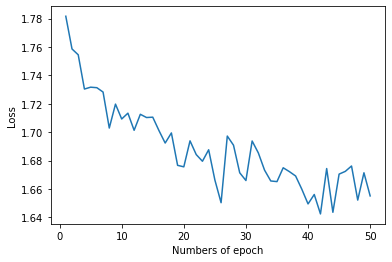

Plot test accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Test Accuracy: [0.3776, 0.3851, 0.3855, 0.3887, 0.3951, 0.3916, 0.3758, 0.3891, 0.3987, 0.3833, 0.3805, 0.3889, 0.3806, 0.3921, 0.3888, 0.3914, 0.3952, 0.3898, 0.3814, 0.3935, 0.3795, 0.3871, 0.3881, 0.3978, 0.386, 0.3788, 0.3933, 0.3851, 0.3865, 0.39, 0.3828, 0.3861, 0.3834, 0.3805, 0.3967, 0.39, 0.3883, 0.3805, 0.3857, 0.3864, 0.3692, 0.3797, 0.3767, 0.3812, 0.3684, 0.3735, 0.386, 0.3832, 0.3921, 0.3792]


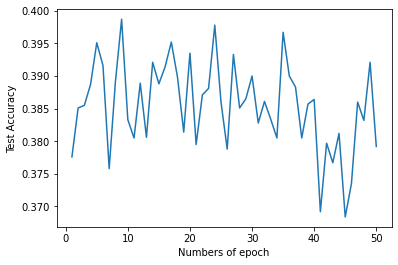

Plot train accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Train Accuracy: [0.3929, 0.39678, 0.4018, 0.40998, 0.4145, 0.41662, 0.40622, 0.41892, 0.42512, 0.41874, 0.4107, 0.42646, 0.41416, 0.42788, 0.42534, 0.4199, 0.43368, 0.42764, 0.42588, 0.43496, 0.41986, 0.43008, 0.43004, 0.4442, 0.42742, 0.42694, 0.43898, 0.42958, 0.4344, 0.43748, 0.43254, 0.44012, 0.43058, 0.42334, 0.44156, 0.43718, 0.4369, 0.43738, 0.43786, 0.4375, 0.42462, 0.43768, 0.43214, 0.43948, 0.43046, 0.43794, 0.44486, 0.44624, 0.44956, 0.44054]


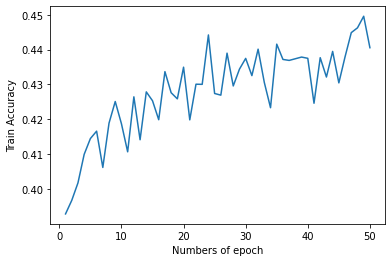

In [4]:
#####################################
# 1. Loading and normalizing CIFAR10
#####################################

import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 4

transform = transforms.Compose(
    [transforms.ToTensor(),    #numpy->Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #將數值正規劃到-1~1之間

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    #Download train dataset 50000
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)     #Download test dataset 10000

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

####################################
#  show some of the training images
####################################

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5      # unnormalize
    npimg = img.numpy()      # tensor -> numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     #改變通道順序

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#########################################
# 2. Define a Convolution Neural Network
#########################################

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 120)  # 5*5*16=conv2+pool後的大小
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # not using ReLU
        x = x.view(-1, 3*32*32)
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x

net = Net()

##########################################
# 3. Define a Loss function and optimizer
##########################################

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

########################
# 4. Train the network
########################

EPOCHS = 50
# curve of loss:
epoch_=[]
loss_=[]
epoch_change = False

# test accuracy:
test_acc=[]

# test accuracy:
train_acc=[]

for epoch in range(EPOCHS):  # loop over the dataset multiple times ＃跑完全部data是一個epoch,一次跑batch_size張data

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):    # i=第幾批data
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #train
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches #每2000批印出來
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            
            # curve of loss
            if epoch_change == False and epoch_ != []:
                epoch_.pop()
                epoch_.append(epoch+1)
                loss_.pop()
                loss_.append(running_loss / 2000)
            else:
                epoch_.append(epoch+1)
                loss_.append(running_loss / 2000)
                epoch_change = False
            
            running_loss = 0.0
            
    epoch_change = True
    
    #######################################
    # 5. Test the network on the test data
    #######################################

    dataiter = iter(testloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    test_acc.append(correct / total)

    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            if labels.shape[0] == BATCH_SIZE:   #若BATCH_SIZE除10000除不盡, 則忽略最後一筆
                for i in range(BATCH_SIZE):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1
    
    ########################################
    # 6. Test the network on the train data
    ########################################
    
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    train_acc.append(correct / total)
    
print('Finished Training')

#Plot curve of loss:
from matplotlib import pyplot as plt
print("\nPlot curve of loss:")
plt.plot(epoch_,loss_) 
print("Epoch:",epoch_)
print("Loss:",loss_)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Loss")
plt.show()

#Plot test accuracy:
print("Plot test accuracy:")
plt.plot(epoch_,test_acc) 
print("Epoch:",epoch_)
print("Test Accuracy:",test_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Test Accuracy")
plt.show()

#Plot train accuracy:
print("Plot train accuracy:")
plt.plot(epoch_,train_acc) 
print("Epoch:",epoch_)
print("Train Accuracy:",train_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Train Accuracy")
plt.show()

Answer for Part 3:\
The ReLU function is f(x)=max(0,x). While using ReLU, the loss reduce to 0.6 after 50 epoch. But without using ReLU, the loss only reduce to 1.6 after 50 epoch. Because, ReLUs improve neural networks by speeding up training. And for accuracy, without ReLU function has poorer performance as compared to using ReLU. This is because, without ReLU function after each layer, the whole network act as a simple linear transformation. That makes it not having so much power for doing image classification.

# Part 4: Convolutional layer + Multiple fully connected layers

4. Change the code by adding two convolutional layers along with maxpooling layers before the fully connected layers. This will be similar to the example in the tutorial. Use this model for the following sections.

In [5]:
########################################################################
# 2. Define a Convolution Neural Network
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Copy the neural network from the Neural Networks section before and modify it to
# take 3-channel images (instead of 1-channel images as it was defined).

import torch.nn as nn
import torch.nn.functional as F

#feature map size = [(image_size - kernal_size) / stride(defalut:1)] + 1
# torch.nn.Conv2d(in_channels, out_channels, kernel_size)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # conv1: input=32*32*3, cal:[(32-5)/1]+1=28 -> feature map=28*28, output=28*28*6
        self.conv1 = nn.Conv2d(3, 6, 5) #input=3, output=6, kernal size=5(5*5)
        
        # pool: input=28*28*6, cal:28/2=14, output=14*14*6
        self.pool = nn.MaxPool2d(2, 2)  #kernal size=2(2*2), stride=2
        
        # conv2: input=14*14*6, cal:[(14-5)/1]+1=10 -> feature map=10*10, output=10*10*16
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # fully connected layer: input=5*5*16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5*16=conv2+pool後的大小
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 32*32*3 -> 28*28*6 -> 14*14*6
        x = self.pool(F.relu(self.conv1(x)))
        
        # 14*14*6 -> 10*10*16 -> 5*5*16
        x = self.pool(F.relu(self.conv2(x)))
        
        #改變shape(壓平)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

# Part 5: Try multiple batch sizes

5. Try multiple batch sizes to see the effect and describe the findings. Please use batch size of 1, 4, and 1000. If 1000 does not fit into the memory of your machine, please feel free to reduce it to a largest possible number.

BATCH_SIZE = 1

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.239
[1,  4000] loss: 2.057
[1,  6000] loss: 1.941
[1,  8000] loss: 1.856
[1, 10000] loss: 1.796
[1, 12000] loss: 1.725
[1, 14000] loss: 1.736
[1, 16000] loss: 1.661
[1, 18000] loss: 1.679
[1, 20000] loss: 1.639
[1, 22000] loss: 1.608
[1, 24000] loss: 1.619
[1, 26000] loss: 1.609
[1, 28000] loss: 1.614
[1, 30000] loss: 1.561
[1, 32000] loss: 1.604
[1, 34000] loss: 1.589
[1, 36000] loss: 1.633
[1, 38000] loss: 1.508
[1, 40000] loss: 1.589
[1, 42000] loss: 1.557
[1, 44000] loss: 1.539
[1, 46000] loss: 1.552
[1, 48000] loss: 1.578
[1, 50000] loss: 1.543
[2,  2000] loss: 1.494
[2,  4000] loss: 1.504
[2,  6000] loss: 1.483
[2,  8000] loss: 1.486
[2, 10000] loss: 1.550
[2, 12000] loss: 1.499
[2, 14000] loss: 1.510
[2, 16000] loss: 1.460
[2, 18000] loss: 1.517
[2, 20000] loss: 1.498
[2, 22000] loss: 1.502
[2, 24000] loss: 1.465
[2, 26000] loss: 1.503
[2, 28000] loss: 1.513
[2, 30000] loss: 1.440
[2, 

[14, 48000] loss: 1.625
[14, 50000] loss: 1.647
[15,  2000] loss: 1.495
[15,  4000] loss: 1.536
[15,  6000] loss: 1.448
[15,  8000] loss: 1.513
[15, 10000] loss: 1.584
[15, 12000] loss: 1.604
[15, 14000] loss: 1.606
[15, 16000] loss: 1.584
[15, 18000] loss: 1.557
[15, 20000] loss: 1.537
[15, 22000] loss: 1.472
[15, 24000] loss: 1.540
[15, 26000] loss: 1.481
[15, 28000] loss: 1.645
[15, 30000] loss: 1.564
[15, 32000] loss: 1.483
[15, 34000] loss: 1.564
[15, 36000] loss: 1.599
[15, 38000] loss: 1.565
[15, 40000] loss: 1.539
[15, 42000] loss: 1.556
[15, 44000] loss: 1.545
[15, 46000] loss: 1.539
[15, 48000] loss: 1.567
[15, 50000] loss: 1.592
[16,  2000] loss: 1.509
[16,  4000] loss: 1.565
[16,  6000] loss: 1.644
[16,  8000] loss: 1.542
[16, 10000] loss: 1.490
[16, 12000] loss: 1.524
[16, 14000] loss: 1.642
[16, 16000] loss: 1.567
[16, 18000] loss: 1.512
[16, 20000] loss: 1.526
[16, 22000] loss: 1.552
[16, 24000] loss: 1.540
[16, 26000] loss: 1.525
[16, 28000] loss: 1.552
[16, 30000] loss

[28, 32000] loss: 1.774
[28, 34000] loss: 1.759
[28, 36000] loss: 1.761
[28, 38000] loss: 1.663
[28, 40000] loss: 1.632
[28, 42000] loss: 1.718
[28, 44000] loss: 1.866
[28, 46000] loss: 1.897
[28, 48000] loss: 1.725
[28, 50000] loss: 1.750
[29,  2000] loss: 1.724
[29,  4000] loss: 1.780
[29,  6000] loss: 1.733
[29,  8000] loss: 1.808
[29, 10000] loss: 1.785
[29, 12000] loss: 1.862
[29, 14000] loss: 1.855
[29, 16000] loss: 1.836
[29, 18000] loss: 1.867
[29, 20000] loss: 1.929
[29, 22000] loss: 1.731
[29, 24000] loss: 1.779
[29, 26000] loss: 1.792
[29, 28000] loss: 1.871
[29, 30000] loss: 1.775
[29, 32000] loss: 1.815
[29, 34000] loss: 1.829
[29, 36000] loss: 1.784
[29, 38000] loss: 1.774
[29, 40000] loss: 1.862
[29, 42000] loss: 1.874
[29, 44000] loss: 1.793
[29, 46000] loss: 1.808
[29, 48000] loss: 1.767
[29, 50000] loss: 1.936
[30,  2000] loss: 1.815
[30,  4000] loss: 1.802
[30,  6000] loss: 1.818
[30,  8000] loss: 1.822
[30, 10000] loss: 1.810
[30, 12000] loss: 1.796
[30, 14000] loss

[42, 16000] loss: 2.286
[42, 18000] loss: 2.285
[42, 20000] loss: 2.290
[42, 22000] loss: 2.289
[42, 24000] loss: 2.275
[42, 26000] loss: 2.293
[42, 28000] loss: 2.270
[42, 30000] loss: 2.276
[42, 32000] loss: 2.294
[42, 34000] loss: 2.301
[42, 36000] loss: 2.290
[42, 38000] loss: 2.265
[42, 40000] loss: 2.229
[42, 42000] loss: 2.248
[42, 44000] loss: 2.225
[42, 46000] loss: 2.261
[42, 48000] loss: 2.212
[42, 50000] loss: 2.203
[43,  2000] loss: 2.198
[43,  4000] loss: 2.197
[43,  6000] loss: 2.187
[43,  8000] loss: 2.184
[43, 10000] loss: 2.172
[43, 12000] loss: 2.190
[43, 14000] loss: 2.159
[43, 16000] loss: 2.169
[43, 18000] loss: 2.169
[43, 20000] loss: 2.151
[43, 22000] loss: 2.183
[43, 24000] loss: 2.295
[43, 26000] loss: 2.249
[43, 28000] loss: 2.250
[43, 30000] loss: 2.239
[43, 32000] loss: 2.193
[43, 34000] loss: 2.160
[43, 36000] loss: 2.140
[43, 38000] loss: 2.112
[43, 40000] loss: 2.121
[43, 42000] loss: 2.139
[43, 44000] loss: 2.132
[43, 46000] loss: 2.187
[43, 48000] loss

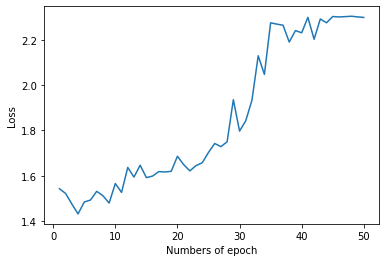

Plot test accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Test Accuracy: [0.4571, 0.4357, 0.4716, 0.4944, 0.4803, 0.4619, 0.4462, 0.4808, 0.476, 0.482, 0.4428, 0.4223, 0.4335, 0.451, 0.4825, 0.4235, 0.4514, 0.4592, 0.4329, 0.4598, 0.3769, 0.4306, 0.4486, 0.3827, 0.4286, 0.4198, 0.3804, 0.385, 0.3011, 0.3477, 0.3361, 0.2955, 0.1686, 0.2246, 0.1317, 0.1212, 0.1259, 0.1618, 0.134, 0.1376, 0.1044, 0.1505, 0.1117, 0.1187, 0.1002, 0.1012, 0.1012, 0.1013, 0.1, 0.1006]


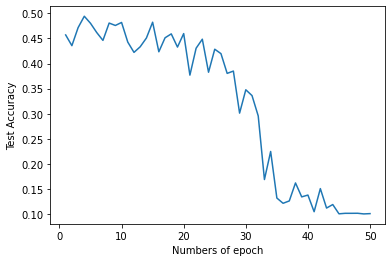

Plot train accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Train Accuracy: [0.46514, 0.45022, 0.49996, 0.51128, 0.5066, 0.50218, 0.48226, 0.52004, 0.52506, 0.51436, 0.48286, 0.45602, 0.45446, 0.4796, 0.52408, 0.45158, 0.4937, 0.48404, 0.47806, 0.49992, 0.4082, 0.46882, 0.49266, 0.4123, 0.46246, 0.45654, 0.4105, 0.41248, 0.32276, 0.36832, 0.35724, 0.30898, 0.17286, 0.23002, 0.13076, 0.12284, 0.12918, 0.1609, 0.13518, 0.13586, 0.1048, 0.15118, 0.113, 0.11892, 0.1004, 0.10114, 0.10114, 0.10106, 0.1, 0.10056]


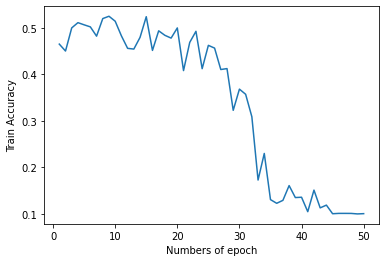

In [6]:
#####################################
# 1. Loading and normalizing CIFAR10
#####################################

import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 1

transform = transforms.Compose(
    [transforms.ToTensor(),    #numpy->Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #將數值正規劃到-1~1之間

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    #Download train dataset 50000
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)     #Download test dataset 10000

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

####################################
# show some of the training images
####################################

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5      # unnormalize
    npimg = img.numpy()      # tensor -> numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     #改變通道順序

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

##########################################
# 2. Define a Convolution Neural Network
##########################################

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #input=3, output=6, kernal size=5(5*5)
        self.pool = nn.MaxPool2d(2, 2)  #kernal size=2(2*2), stride=2
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

##########################################
# 3. Define a Loss function and optimizer
##########################################

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#######################
# 4. Train the network
#######################

EPOCHS = 50

# curve of loss:
epoch_=[]
loss_=[]
epoch_change = False

# test accuracy:
test_acc=[]

# test accuracy:
train_acc=[]

for epoch in range(EPOCHS):  # loop over the dataset multiple times ＃跑完全部data是一個epoch,一次跑batch_size張data

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):    # i=第幾批data
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #train
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches #每2000批印出來
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            
            # curve of loss
            if epoch_change == False and epoch_ != []:
                epoch_.pop()
                epoch_.append(epoch+1)
                loss_.pop()
                loss_.append(running_loss / 2000)
            else:
                epoch_.append(epoch+1)
                loss_.append(running_loss / 2000)
                epoch_change = False
            
            running_loss = 0.0
            
    epoch_change = True
    
    #######################################
    # 5. Test the network on the test data
    #######################################

    dataiter = iter(testloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc.append(correct / total)

    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels)   #batch_size = 1, squeeze()要拿掉
            if labels.shape[0] == BATCH_SIZE:   #若BATCH_SIZE除10000除不盡, 則忽略最後一筆
                for i in range(BATCH_SIZE):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1


    ########################################
    # 6. Test the network on the train data
    ########################################
    
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    train_acc.append(correct / total)
    
print('Finished Training')

#Plot curve of loss:
from matplotlib import pyplot as plt
print("\nPlot curve of loss:")
plt.plot(epoch_,loss_) 
print("Epoch:",epoch_)
print("Loss:",loss_)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Loss")
plt.show()

#Plot test accuracy:
print("Plot test accuracy:")
plt.plot(epoch_,test_acc) 
print("Epoch:",epoch_)
print("Test Accuracy:",test_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Test Accuracy")
plt.show()

#Plot train accuracy:
print("Plot train accuracy:")
plt.plot(epoch_,train_acc) 
print("Epoch:",epoch_)
print("Train Accuracy:",train_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Train Accuracy")
plt.show()

BATCH_SIZE = 4

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.214
[1,  4000] loss: 1.849
[1,  6000] loss: 1.664
[1,  8000] loss: 1.567
[1, 10000] loss: 1.477
[1, 12000] loss: 1.422
[2,  2000] loss: 1.368
[2,  4000] loss: 1.337
[2,  6000] loss: 1.318
[2,  8000] loss: 1.297
[2, 10000] loss: 1.270
[2, 12000] loss: 1.244
[3,  2000] loss: 1.182
[3,  4000] loss: 1.177
[3,  6000] loss: 1.176
[3,  8000] loss: 1.169
[3, 10000] loss: 1.158
[3, 12000] loss: 1.164
[4,  2000] loss: 1.059
[4,  4000] loss: 1.083
[4,  6000] loss: 1.073
[4,  8000] loss: 1.078
[4, 10000] loss: 1.077
[4, 12000] loss: 1.083
[5,  2000] loss: 1.001
[5,  4000] loss: 1.003
[5,  6000] loss: 1.004
[5,  8000] loss: 1.011
[5, 10000] loss: 1.005
[5, 12000] loss: 1.014
[6,  2000] loss: 0.917
[6,  4000] loss: 0.943
[6,  6000] loss: 0.968
[6,  8000] loss: 0.948
[6, 10000] loss: 0.963
[6, 12000] loss: 0.966
[7,  2000] loss: 0.859
[7,  4000] loss: 0.905
[7,  6000] loss: 0.897
[7,  8000] loss: 0.907
[7, 

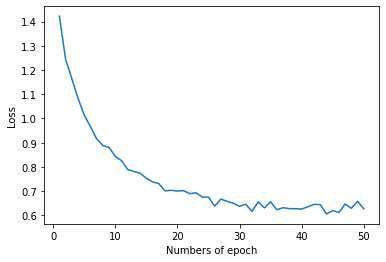

Plot test accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Test Accuracy: [0.4967, 0.5428, 0.5881, 0.6141, 0.6214, 0.6273, 0.6294, 0.6309, 0.6147, 0.6406, 0.6391, 0.6383, 0.6295, 0.6341, 0.636, 0.6176, 0.6235, 0.6185, 0.6211, 0.6089, 0.6211, 0.6212, 0.6, 0.6162, 0.5968, 0.6129, 0.6146, 0.6091, 0.6054, 0.6011, 0.6018, 0.5976, 0.5976, 0.6009, 0.5974, 0.5952, 0.6057, 0.5956, 0.5959, 0.604, 0.5877, 0.5983, 0.6079, 0.5943, 0.5991, 0.5983, 0.5987, 0.599, 0.5887, 0.5958]


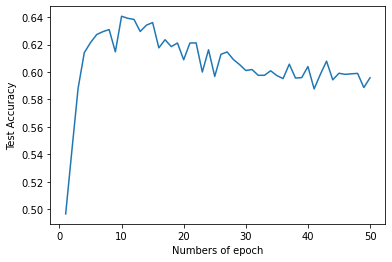

Plot train accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Train Accuracy: [0.50738, 0.56736, 0.62864, 0.65764, 0.6816, 0.69978, 0.70542, 0.71688, 0.71016, 0.75416, 0.75638, 0.76968, 0.7591, 0.77766, 0.78664, 0.77526, 0.78094, 0.7869, 0.79774, 0.76884, 0.80134, 0.81352, 0.77342, 0.81242, 0.7934, 0.8164, 0.81198, 0.81908, 0.81162, 0.80974, 0.79402, 0.80476, 0.82186, 0.82294, 0.81218, 0.81972, 0.82024, 0.7973, 0.82918, 0.84066, 0.79526, 0.81498, 0.8388, 0.81456, 0.81466, 0.8335, 0.81224, 0.83358, 0.8262, 0.8237]


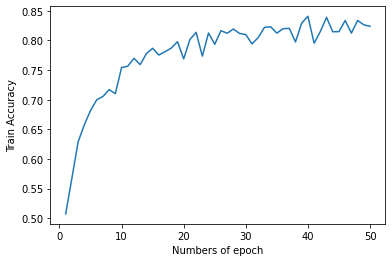

In [7]:
# 1. Loading and normalizing CIFAR10
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

# Using ``torchvision``, it’s extremely easy to load CIFAR10.
# """
import torch
import torchvision
import torchvision.transforms as transforms

########################################################################
# The output of torchvision datasets are PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1].

BATCH_SIZE = 4

transform = transforms.Compose(
    [transforms.ToTensor(),    #numpy->Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #將數值正規劃到-1~1之間

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    #Download train dataset 50000
                                        download=True, transform=transform)

# batch_size: how many samples per batch to load（每批讀取的image數量）
#批次讀取數據->增加效能
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)     #Download test dataset 10000

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

########################################################################
# Let us show some of the training images, for fun.

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5      # unnormalize
    npimg = img.numpy()      # tensor -> numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     #改變通道順序


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# print("images:",images.shape)👀
# print("labels:",labels.shape)

# show images 展示"一批"data
# imshow(torchvision.utils.make_grid(images))👀    #image展示方式：網格
# plt.show()
# print labels
# print(' '.join('%5s' % classes[labels[j]] for j in range(BATCH_SIZE))) 


########################################################################
# 2. Define a Convolution Neural Network
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Copy the neural network from the Neural Networks section before and modify it to
# take 3-channel images (instead of 1-channel images as it was defined).

import torch.nn as nn
import torch.nn.functional as F

#feature map size = [(image_size - kernal_size) / stride(defalut:1)] + 1
# torch.nn.Conv2d(in_channels, out_channels, kernel_size)

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # conv1: input=32*32*3, cal:[(32-5)/1]+1=28 -> feature map=28*28, output=28*28*6
        self.conv1 = nn.Conv2d(3, 6, 5) #input=3, output=6, kernal size=5(5*5)
        
        # pool: input=28*28*6, cal:28/2=14, output=14*14*6
        self.pool = nn.MaxPool2d(2, 2)  #kernal size=2(2*2), stride=2
        
        # conv2: input=14*14*6, cal:[(14-5)/1]+1=10 -> feature map=10*10, output=10*10*16
        self.conv2 = nn.Conv2d(6, 16, 5)
        
        # fully connected layer: input=5*5*16
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5*16=conv2+pool後的大小
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 32*32*3 -> 28*28*6 -> 14*14*6
        x = self.pool(F.relu(self.conv1(x)))
        
        # 14*14*6 -> 10*10*16 -> 5*5*16
        x = self.pool(F.relu(self.conv2(x)))
        
        #改變shape(壓平)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


########################################################################
# 3. Define a Loss function and optimizer
# ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
# Let's use a Classification Cross-Entropy loss and SGD with momentum.

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

########################################################################
# 4. Train the network
# ^^^^^^^^^^^^^^^^^^^^
#
# This is when things start to get interesting.
# We simply have to loop over our data iterator, and feed the inputs to the
# network and optimize.

EPOCHS = 50
#curve of loss:
epoch_=[]
loss_=[]
epoch_change = False

#test accuracy:
test_acc=[]

#test accuracy:
train_acc=[]


for epoch in range(EPOCHS):  # loop over the dataset multiple times ＃跑完全部data是一個epoch,一次跑batch_size張data

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):    # i=第幾批data
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #train
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches #每2000批印出來
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            
            #curve of loss
            if epoch_change == False and epoch_ != []:
                epoch_.pop()
                epoch_.append(epoch+1)
                loss_.pop()
                loss_.append(running_loss / 2000)
            else:
                epoch_.append(epoch+1)
                loss_.append(running_loss / 2000)
                epoch_change = False
            
            running_loss = 0.0

    epoch_change = True
    
    
    
    ########################################################################
    # 5. Test the network on the test data
    # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    #
    # We have trained the network for 2 passes over the training dataset.
    # But we need to check if the network has learnt anything at all.
    #
    # We will check this by predicting the class label that the neural network
    # outputs, and checking it against the ground-truth. If the prediction is
    # correct, we add the sample to the list of correct predictions.
    #
    # Okay, first step. Let us display an image from the test set to get familiar.

    dataiter = iter(testloader)
    images, labels = dataiter.next()

    # print images
#     imshow(torchvision.utils.make_grid(images))👀
#     print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(BATCH_SIZE)))
#     plt.show()

    ########################################################################
    # Okay, now let us see what the neural network thinks these examples above are:

    outputs = net(images)

    ########################################################################
    # The outputs are energies for the 10 classes.
    # Higher the energy for a class, the more the network
    # thinks that the image is of the particular class.
    # So, let's get the index of the highest energy:
    _, predicted = torch.max(outputs, 1)

#     print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]👀
#                                   for j in range(BATCH_SIZE)))

    ########################################################################
    # The results seem pretty good.
    #
    # Let us look at how the network performs on the whole dataset.

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

#     print('Accuracy of the network on the 10000 test images: %d %%' % (👀
#         100 * correct / total))
    
    test_acc.append(correct / total)

    ########################################################################
    # That looks waaay better than chance, which is 10% accuracy (randomly picking
    # a class out of 10 classes).
    # Seems like the network learnt something.
    #
    # Hmmm, what are the classes that performed well, and the classes that did
    # not perform well:

    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            if labels.shape[0] == BATCH_SIZE:   #若BATCH_SIZE除10000除不盡, 則忽略最後一筆
                for i in range(BATCH_SIZE):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1


#     for i in range(10):👀
#         print('Accuracy of %5s : %2d %%' % (
#             classes[i], 100 * class_correct[i] / class_total[i]))
    
    
    ########################################################################
    # 6. Test the network on the train data
    # ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
#     print('Accuracy of the network on the 10000 train images: %d %%' % (100 * correct / total))
    
    train_acc.append(correct / total)
    
print('Finished Training')

#Plot curve of loss:
from matplotlib import pyplot as plt
print("\nPlot curve of loss:")
plt.plot(epoch_,loss_) 
print("Epoch:",epoch_)
print("Loss:",loss_)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Loss")
plt.show()

#Plot test accuracy:
print("Plot test accuracy:")
plt.plot(epoch_,test_acc) 
print("Epoch:",epoch_)
print("Test Accuracy:",test_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Test Accuracy")
plt.show()

#Plot train accuracy:
print("Plot train accuracy:")
plt.plot(epoch_,train_acc) 
print("Epoch:",epoch_)
print("Train Accuracy:",train_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Train Accuracy")
plt.show()

BATCH_SIZE = 1000

Files already downloaded and verified
Files already downloaded and verified
[1,    20] loss: 0.023
[1,    40] loss: 0.023
[2,    20] loss: 0.023
[2,    40] loss: 0.023
[3,    20] loss: 0.023
[3,    40] loss: 0.023
[4,    20] loss: 0.023
[4,    40] loss: 0.023
[5,    20] loss: 0.023
[5,    40] loss: 0.023
[6,    20] loss: 0.023
[6,    40] loss: 0.023
[7,    20] loss: 0.023
[7,    40] loss: 0.023
[8,    20] loss: 0.023
[8,    40] loss: 0.023
[9,    20] loss: 0.023
[9,    40] loss: 0.023
[10,    20] loss: 0.023
[10,    40] loss: 0.023
[11,    20] loss: 0.023
[11,    40] loss: 0.023
[12,    20] loss: 0.023
[12,    40] loss: 0.023
[13,    20] loss: 0.023
[13,    40] loss: 0.023
[14,    20] loss: 0.023
[14,    40] loss: 0.023
[15,    20] loss: 0.023
[15,    40] loss: 0.023
[16,    20] loss: 0.023
[16,    40] loss: 0.023
[17,    20] loss: 0.023
[17,    40] loss: 0.023
[18,    20] loss: 0.023
[18,    40] loss: 0.023
[19,    20] loss: 0.023
[19,    40] loss: 0.023
[20,    20] loss: 0.023
[20,  

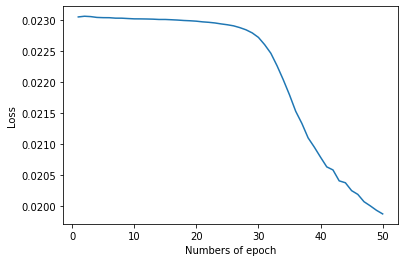

Plot test accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Test Accuracy: [0.0657, 0.0677, 0.0744, 0.0832, 0.0892, 0.0988, 0.1098, 0.1202, 0.1275, 0.1361, 0.1436, 0.1474, 0.1591, 0.1625, 0.1631, 0.1637, 0.1649, 0.1674, 0.1684, 0.1679, 0.1696, 0.1702, 0.1707, 0.1707, 0.1705, 0.1691, 0.1665, 0.1647, 0.1667, 0.169, 0.1694, 0.1727, 0.1768, 0.182, 0.1882, 0.212, 0.223, 0.2306, 0.2399, 0.2462, 0.2489, 0.2556, 0.2616, 0.2627, 0.2648, 0.268, 0.274, 0.2753, 0.2822, 0.2806]


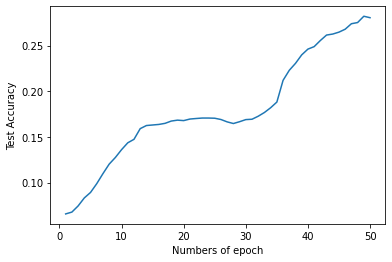

Plot train accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Train Accuracy: [0.06766, 0.0711, 0.0768, 0.08366, 0.09062, 0.09946, 0.10928, 0.11964, 0.1294, 0.13694, 0.14406, 0.14884, 0.15726, 0.1607, 0.1631, 0.16354, 0.165, 0.16614, 0.16638, 0.16658, 0.16756, 0.1679, 0.16912, 0.16992, 0.17026, 0.17008, 0.1666, 0.1635, 0.1632, 0.16668, 0.16984, 0.1717, 0.17572, 0.18064, 0.18864, 0.20986, 0.22036, 0.22678, 0.23336, 0.23928, 0.24148, 0.24898, 0.25448, 0.25738, 0.25994, 0.26158, 0.26536, 0.26718, 0.27306, 0.27532]


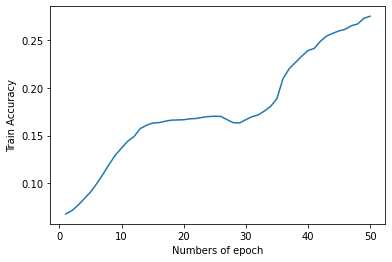

In [8]:
#####################################
# 1. Loading and normalizing CIFAR10
#####################################

import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 1000

transform = transforms.Compose(
    [transforms.ToTensor(),    #numpy->Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #將數值正規劃到-1~1之間

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    #Download train dataset 50000
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)     #Download test dataset 10000

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

#  show some of the training images

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5      # unnormalize
    npimg = img.numpy()      # tensor -> numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     #改變通道順序

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#########################################
# 2. Define a Convolution Neural Network
#########################################

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

##########################################
# 3. Define a Loss function and optimizer
##########################################

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#######################
# 4. Train the network
#######################

EPOCHS = 50

#curve of loss:
epoch_=[]
loss_=[]
epoch_change = False

#test accuracy:
test_acc=[]

#test accuracy:
train_acc=[]


for epoch in range(EPOCHS):  # loop over the dataset multiple times ＃跑完全部data是一個epoch,一次跑batch_size張data

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):    # i=第幾批data
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #train
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 200 mini-batches #每200批印出來
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            
            #curve of loss
            if epoch_change == False and epoch_ != []:
                epoch_.pop()
                epoch_.append(epoch+1)
                loss_.pop()
                loss_.append(running_loss / 2000)
            else:
                epoch_.append(epoch+1)
                loss_.append(running_loss / 2000)
                epoch_change = False
            
            running_loss = 0.0
 
    epoch_change = True
    
    #######################################
    # 5. Test the network on the test data
    #######################################

    dataiter = iter(testloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc.append(correct / total)

    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            if labels.shape[0] == BATCH_SIZE:   #若BATCH_SIZE除10000除不盡, 則忽略最後一筆
                for i in range(BATCH_SIZE):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1
    
    ########################################
    # 6. Test the network on the train data
    ########################################
    
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    train_acc.append(correct / total)

print('Finished Training')

#Plot curve of loss:
from matplotlib import pyplot as plt
print("\nPlot curve of loss:")
plt.plot(epoch_,loss_) 
print("Epoch:",epoch_)
print("Loss:",loss_)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Loss")
plt.show()

#Plot test accuracy:
print("Plot test accuracy:")
plt.plot(epoch_,test_acc) 
print("Epoch:",epoch_)
print("Test Accuracy:",test_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Test Accuracy")
plt.show()

#Plot train accuracy:
print("Plot train accuracy:")
plt.plot(epoch_,train_acc) 
print("Epoch:",epoch_)
print("Train Accuracy:",train_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Train Accuracy")
plt.show()

# Part 6: Multiple learning rates

6. Try multiple learning rates to see the effect and describe the findings. Please use learning rates of 10, 0.1, 0.01, and 0.0001.

Use learning rates of 10

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 65.630
[1,  4000] loss: 17.904
[1,  6000] loss: 18.374
[1,  8000] loss: 18.328
[1, 10000] loss: 18.500
[1, 12000] loss: nan
[2,  2000] loss: nan
[2,  4000] loss: nan
[2,  6000] loss: nan
[2,  8000] loss: nan
[2, 10000] loss: nan
[2, 12000] loss: nan
[3,  2000] loss: nan
[3,  4000] loss: nan
[3,  6000] loss: nan
[3,  8000] loss: nan
[3, 10000] loss: nan
[3, 12000] loss: nan
[4,  2000] loss: nan
[4,  4000] loss: nan
[4,  6000] loss: nan
[4,  8000] loss: nan
[4, 10000] loss: nan
[4, 12000] loss: nan
[5,  2000] loss: nan
[5,  4000] loss: nan
[5,  6000] loss: nan
[5,  8000] loss: nan
[5, 10000] loss: nan
[5, 12000] loss: nan
[6,  2000] loss: nan
[6,  4000] loss: nan
[6,  6000] loss: nan
[6,  8000] loss: nan
[6, 10000] loss: nan
[6, 12000] loss: nan
[7,  2000] loss: nan
[7,  4000] loss: nan
[7,  6000] loss: nan
[7,  8000] loss: nan
[7, 10000] loss: nan
[7, 12000] loss: nan
[8,  2000] loss: nan
[8,  4

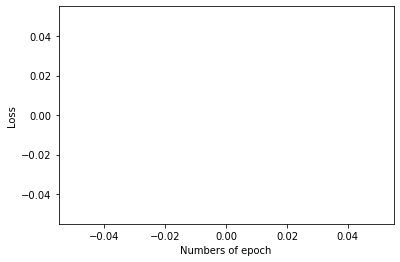

Plot test accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Test Accuracy: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


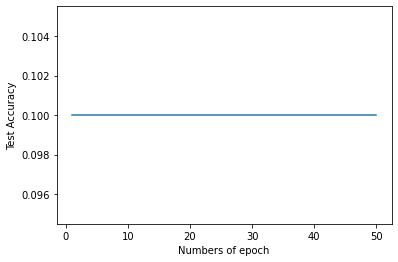

Plot train accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Train Accuracy: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


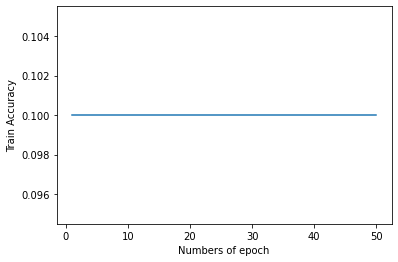

In [9]:
######################################
# 1. Loading and normalizing CIFAR10
######################################

import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 4

transform = transforms.Compose(
    [transforms.ToTensor(),    #numpy->Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #將數值正規劃到-1~1之間

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    #Download train dataset 50000
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)     #Download test dataset 10000

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Let us show some of the training images, for fun.

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5      # unnormalize
    npimg = img.numpy()      # tensor -> numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     #改變通道順序


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

##########################################
# 2. Define a Convolution Neural Network
##########################################

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #input=3, output=6, kernal size=5(5*5)
        self.pool = nn.MaxPool2d(2, 2)  #kernal size=2(2*2), stride=2
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5*16=conv2+pool後的大小
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


##########################################
# 3. Define a Loss function and optimizer
##########################################

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=10, momentum=0.9) #learning rate

#######################
# 4. Train the network
#######################

EPOCHS = 50
#curve of loss:
epoch_=[]
loss_=[]
epoch_change = False

#test accuracy:
test_acc=[]

#test accuracy:
train_acc=[]

for epoch in range(EPOCHS):  # loop over the dataset multiple times ＃跑完全部data是一個epoch,一次跑batch_size張data

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):    # i=第幾批data
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #train
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches #每2000批印出來
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            
            #curve of loss
            if epoch_change == False and epoch_ != []:
                epoch_.pop()
                epoch_.append(epoch+1)
                loss_.pop()
                loss_.append(running_loss / 2000)
            else:
                epoch_.append(epoch+1)
                loss_.append(running_loss / 2000)
                epoch_change = False
  
            running_loss = 0.0
            
    epoch_change = True
    
    #######################################
    # 5. Test the network on the test data
    #######################################

    dataiter = iter(testloader)
    images, labels = dataiter.next()

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc.append(correct / total)


    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            if labels.shape[0] == BATCH_SIZE:   #若BATCH_SIZE除10000除不盡, 則忽略最後一筆
                for i in range(BATCH_SIZE):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1

    ########################################
    # 6. Test the network on the train data
    ########################################
    
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    train_acc.append(correct / total)  
    
print('Finished Training')

#Plot curve of loss:
from matplotlib import pyplot as plt
print("\nPlot curve of loss:")
plt.plot(epoch_,loss_) 
print("Epoch:",epoch_)
print("Loss:",loss_)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Loss")
plt.show()

#Plot test accuracy:
print("Plot test accuracy:")
plt.plot(epoch_,test_acc) 
print("Epoch:",epoch_)
print("Test Accuracy:",test_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Test Accuracy")
plt.show()

#Plot train accuracy:
print("Plot train accuracy:")
plt.plot(epoch_,train_acc) 
print("Epoch:",epoch_)
print("Train Accuracy:",train_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Train Accuracy")
plt.show()

Use learning rates of 0.1

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.360
[1,  4000] loss: 2.365
[1,  6000] loss: 2.360
[1,  8000] loss: 2.358
[1, 10000] loss: 2.357
[1, 12000] loss: 2.363
[2,  2000] loss: 2.358
[2,  4000] loss: 2.362
[2,  6000] loss: 2.355
[2,  8000] loss: 2.357
[2, 10000] loss: 2.363
[2, 12000] loss: 2.355
[3,  2000] loss: 2.361
[3,  4000] loss: 2.363
[3,  6000] loss: 2.362
[3,  8000] loss: 2.355
[3, 10000] loss: 2.362
[3, 12000] loss: 2.361
[4,  2000] loss: 2.359
[4,  4000] loss: 2.359
[4,  6000] loss: 2.358
[4,  8000] loss: 2.364
[4, 10000] loss: 2.360
[4, 12000] loss: 2.361
[5,  2000] loss: 2.362
[5,  4000] loss: 2.360
[5,  6000] loss: 2.363
[5,  8000] loss: 2.361
[5, 10000] loss: 2.358
[5, 12000] loss: 2.360
[6,  2000] loss: 2.364
[6,  4000] loss: 2.363
[6,  6000] loss: 2.359
[6,  8000] loss: 2.356
[6, 10000] loss: 2.357
[6, 12000] loss: 2.361
[7,  2000] loss: 2.360
[7,  4000] loss: 2.354
[7,  6000] loss: 2.363
[7,  8000] loss: 2.361
[7, 

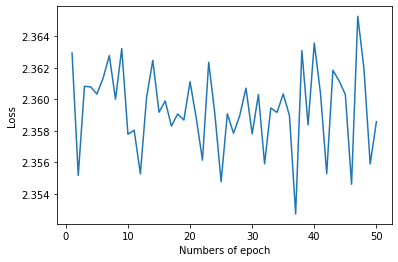

Plot test accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Test Accuracy: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


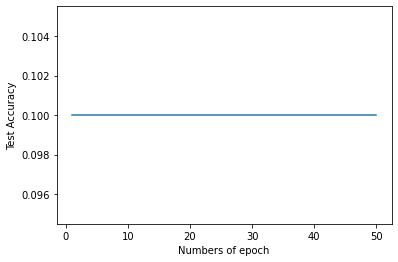

Plot train accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Train Accuracy: [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


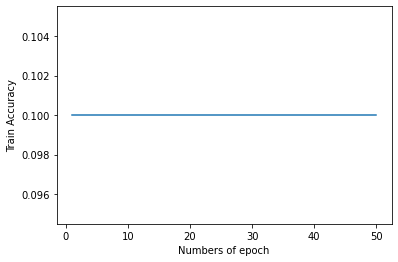

In [10]:
#####################################
# 1. Loading and normalizing CIFAR10
#####################################

import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 4

transform = transforms.Compose(
    [transforms.ToTensor(),    #numpy->Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #將數值正規劃到-1~1之間

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    #Download train dataset 50000
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)     #Download test dataset 10000

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Let us show some of the training images, for fun.

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5      # unnormalize
    npimg = img.numpy()      # tensor -> numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     #改變通道順序

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#########################################
# 2. Define a Convolution Neural Network
#########################################

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #input=3, output=6, kernal size=5(5*5)
        self.pool = nn.MaxPool2d(2, 2)  #kernal size=2(2*2), stride=2
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5*16=conv2+pool後的大小
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # 32*32*3 -> 28*28*6 -> 14*14*6
        x = self.pool(F.relu(self.conv1(x)))
        
        # 14*14*6 -> 10*10*16 -> 5*5*16
        x = self.pool(F.relu(self.conv2(x)))
        
        #改變shape(壓平)
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

##########################################
# 3. Define a Loss function and optimizer
##########################################

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9) #learning rate

#######################
# 4. Train the network
#######################

EPOCHS = 50
#curve of loss:
epoch_=[]
loss_=[]
epoch_change = False

#test accuracy:
test_acc=[]

#test accuracy:
train_acc=[]


for epoch in range(EPOCHS):  # loop over the dataset multiple times ＃跑完全部data是一個epoch,一次跑batch_size張data

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):    # i=第幾批data
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #train
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches #每2000批印出來
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            
            #curve of loss
            if epoch_change == False and epoch_ != []:
                epoch_.pop()
                epoch_.append(epoch+1)
                loss_.pop()
                loss_.append(running_loss / 2000)
            else:
                epoch_.append(epoch+1)
                loss_.append(running_loss / 2000)
                epoch_change = False
            
            running_loss = 0.0
            
    epoch_change = True
    

    #######################################
    # 5. Test the network on the test data
    #######################################

    dataiter = iter(testloader)
    images, labels = dataiter.next()

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)

    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc.append(correct / total)
    

    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            if labels.shape[0] == BATCH_SIZE:   #若BATCH_SIZE除10000除不盡, 則忽略最後一筆
                for i in range(BATCH_SIZE):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1
                    
    
    ########################################
    # 6. Test the network on the train data
    ########################################
    
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    train_acc.append(correct / total)    
    
print('Finished Training')

#Plot curve of loss:
from matplotlib import pyplot as plt
print("\nPlot curve of loss:")
plt.plot(epoch_,loss_) 
print("Epoch:",epoch_)
print("Loss:",loss_)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Loss")
plt.show()

#Plot test accuracy:
print("Plot test accuracy:")
plt.plot(epoch_,test_acc) 
print("Epoch:",epoch_)
print("Test Accuracy:",test_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Test Accuracy")
plt.show()

#Plot train accuracy:
print("Plot train accuracy:")
plt.plot(epoch_,train_acc) 
print("Epoch:",epoch_)
print("Train Accuracy:",train_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Train Accuracy")
plt.show()

Use learning rates of 0.01

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.093
[1,  4000] loss: 1.967
[1,  6000] loss: 1.953
[1,  8000] loss: 1.949
[1, 10000] loss: 1.970
[1, 12000] loss: 1.995
[2,  2000] loss: 1.988
[2,  4000] loss: 1.993
[2,  6000] loss: 1.985
[2,  8000] loss: 1.998
[2, 10000] loss: 2.009
[2, 12000] loss: 1.991
[3,  2000] loss: 1.967
[3,  4000] loss: 1.969
[3,  6000] loss: 2.014
[3,  8000] loss: 1.992
[3, 10000] loss: 1.975
[3, 12000] loss: 1.944
[4,  2000] loss: 1.963
[4,  4000] loss: 1.961
[4,  6000] loss: 1.948
[4,  8000] loss: 1.966
[4, 10000] loss: 1.977
[4, 12000] loss: 1.973
[5,  2000] loss: 1.983
[5,  4000] loss: 1.956
[5,  6000] loss: 1.979
[5,  8000] loss: 1.974
[5, 10000] loss: 1.947
[5, 12000] loss: 1.999
[6,  2000] loss: 1.989
[6,  4000] loss: 1.986
[6,  6000] loss: 1.987
[6,  8000] loss: 1.983
[6, 10000] loss: 2.024
[6, 12000] loss: 1.969
[7,  2000] loss: 1.995
[7,  4000] loss: 1.971
[7,  6000] loss: 1.988
[7,  8000] loss: 1.965
[7, 

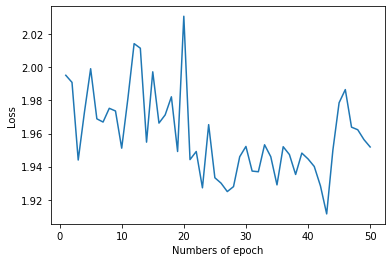

Plot test accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Test Accuracy: [0.2954, 0.2241, 0.222, 0.2641, 0.2351, 0.2578, 0.2472, 0.2346, 0.2529, 0.2584, 0.2458, 0.2567, 0.2247, 0.2482, 0.2223, 0.1926, 0.2329, 0.2461, 0.2414, 0.2213, 0.2442, 0.2432, 0.2355, 0.232, 0.2576, 0.2587, 0.2383, 0.2318, 0.2179, 0.2399, 0.2417, 0.249, 0.2443, 0.2168, 0.2555, 0.2484, 0.2506, 0.2601, 0.235, 0.248, 0.2418, 0.2452, 0.2641, 0.2438, 0.2297, 0.2096, 0.2224, 0.2476, 0.2321, 0.2514]


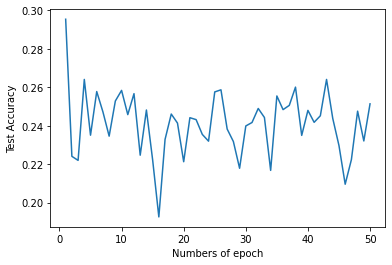

Plot train accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Train Accuracy: [0.28772, 0.22452, 0.22642, 0.26342, 0.2362, 0.25432, 0.24656, 0.23766, 0.2452, 0.2581, 0.24918, 0.25316, 0.22626, 0.25278, 0.2209, 0.19312, 0.23698, 0.25038, 0.23682, 0.21804, 0.24454, 0.24956, 0.23724, 0.23464, 0.257, 0.26078, 0.24696, 0.23494, 0.22738, 0.2506, 0.24508, 0.24442, 0.25034, 0.22568, 0.25898, 0.24756, 0.25538, 0.26212, 0.2329, 0.2544, 0.24398, 0.246, 0.26456, 0.25118, 0.2365, 0.20956, 0.22378, 0.24776, 0.23224, 0.2545]


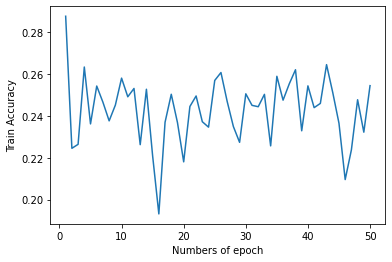

In [6]:
#####################################
# 1. Loading and normalizing CIFAR10
#####################################

import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 4

transform = transforms.Compose(
    [transforms.ToTensor(),    #numpy->Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #將數值正規劃到-1~1之間

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    #Download train dataset 50000
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)     #Download test dataset 10000

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Let us show some of the training images, for fun.

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5      # unnormalize
    npimg = img.numpy()      # tensor -> numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     #改變通道順序

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()


#########################################
# 2. Define a Convolution Neural Network
#########################################

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #input=3, output=6, kernal size=5(5*5)
        self.pool = nn.MaxPool2d(2, 2)  #kernal size=2(2*2), stride=2
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5*16=conv2+pool後的大小
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

##########################################
# 3. Define a Loss function and optimizer
##########################################

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9) #learning rate

#######################
# 4. Train the network
#######################

EPOCHS = 50
#curve of loss:
epoch_=[]
loss_=[]
epoch_change = False

#test accuracy:
test_acc=[]

#test accuracy:
train_acc=[]


for epoch in range(EPOCHS):  # loop over the dataset multiple times ＃跑完全部data是一個epoch,一次跑batch_size張data

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):    # i=第幾批data
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #train
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches #每2000批印出來
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            
            #plot curve of loss
            if epoch_change == False and epoch_ != []:
                epoch_.pop()
                epoch_.append(epoch+1)
                loss_.pop()
                loss_.append(running_loss / 2000)
            else:
                epoch_.append(epoch+1)
                loss_.append(running_loss / 2000)
                epoch_change = False

            running_loss = 0.0

    epoch_change = True

    
    #######################################
    # 5. Test the network on the test data
    #######################################

    dataiter = iter(testloader)
    images, labels = dataiter.next()

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)


    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc.append(correct / total)


    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            if labels.shape[0] == BATCH_SIZE:   #若BATCH_SIZE除10000除不盡, 則忽略最後一筆
                for i in range(BATCH_SIZE):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1

    
    ########################################
    # 6. Test the network on the train data
    ########################################
    
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    train_acc.append(correct / total)
    
print('Finished Training')

#Plot curve of loss:
from matplotlib import pyplot as plt
print("\nPlot curve of loss:")
plt.plot(epoch_,loss_) 
print("Epoch:",epoch_)
print("Loss:",loss_)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Loss")
plt.show()

#Plot test accuracy:
print("Plot test accuracy:")
plt.plot(epoch_,test_acc) 
print("Epoch:",epoch_)
print("Test Accuracy:",test_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Test Accuracy")
plt.show()

#Plot train accuracy:
print("Plot train accuracy:")
plt.plot(epoch_,train_acc) 
print("Epoch:",epoch_)
print("Train Accuracy:",train_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Train Accuracy")
plt.show()

Use learning rates of 0.0001

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.303
[1,  4000] loss: 2.302
[1,  6000] loss: 2.297
[1,  8000] loss: 2.286
[1, 10000] loss: 2.247
[1, 12000] loss: 2.196
[2,  2000] loss: 2.089
[2,  4000] loss: 2.018
[2,  6000] loss: 1.956
[2,  8000] loss: 1.915
[2, 10000] loss: 1.855
[2, 12000] loss: 1.836
[3,  2000] loss: 1.766
[3,  4000] loss: 1.727
[3,  6000] loss: 1.692
[3,  8000] loss: 1.700
[3, 10000] loss: 1.657
[3, 12000] loss: 1.643
[4,  2000] loss: 1.605
[4,  4000] loss: 1.587
[4,  6000] loss: 1.573
[4,  8000] loss: 1.531
[4, 10000] loss: 1.549
[4, 12000] loss: 1.522
[5,  2000] loss: 1.498
[5,  4000] loss: 1.497
[5,  6000] loss: 1.480
[5,  8000] loss: 1.446
[5, 10000] loss: 1.440
[5, 12000] loss: 1.432
[6,  2000] loss: 1.414
[6,  4000] loss: 1.396
[6,  6000] loss: 1.366
[6,  8000] loss: 1.376
[6, 10000] loss: 1.365
[6, 12000] loss: 1.353
[7,  2000] loss: 1.332
[7,  4000] loss: 1.324
[7,  6000] loss: 1.315
[7,  8000] loss: 1.296
[7, 

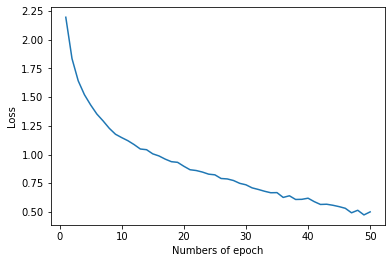

Plot test accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Test Accuracy: [0.2384, 0.3642, 0.4103, 0.4498, 0.4837, 0.4991, 0.5456, 0.5635, 0.577, 0.577, 0.5802, 0.596, 0.6035, 0.6015, 0.6186, 0.6223, 0.6304, 0.6374, 0.6343, 0.641, 0.6426, 0.6465, 0.6294, 0.6435, 0.6428, 0.6432, 0.6531, 0.6492, 0.6521, 0.6561, 0.636, 0.641, 0.6503, 0.6488, 0.6467, 0.641, 0.6411, 0.646, 0.6445, 0.6456, 0.6398, 0.6378, 0.6443, 0.6422, 0.6456, 0.6365, 0.6401, 0.6387, 0.6333, 0.633]


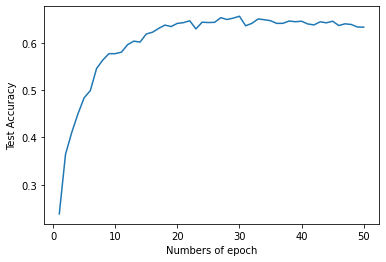

Plot train accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Train Accuracy: [0.22712, 0.35562, 0.40812, 0.45556, 0.48696, 0.50576, 0.55126, 0.57374, 0.58552, 0.59628, 0.60258, 0.6222, 0.6325, 0.63084, 0.65434, 0.67042, 0.67102, 0.6914, 0.69448, 0.69556, 0.71262, 0.72256, 0.70278, 0.72876, 0.73118, 0.74118, 0.75132, 0.75812, 0.76604, 0.77288, 0.74802, 0.77462, 0.7855, 0.78666, 0.786, 0.79348, 0.79766, 0.80734, 0.81524, 0.8207, 0.82318, 0.82192, 0.83796, 0.84024, 0.84316, 0.8301, 0.84188, 0.84362, 0.85, 0.85834]


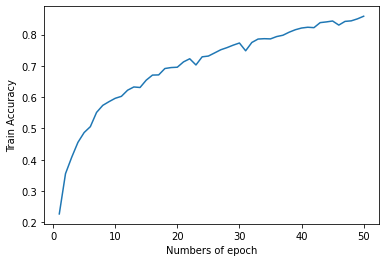

In [12]:
######################################
# 1. Loading and normalizing CIFAR10
######################################

import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 4

transform = transforms.Compose(
    [transforms.ToTensor(),    #numpy->Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #將數值正規劃到-1~1之間

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    #Download train dataset 50000
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)     #Download test dataset 10000

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Let us show some of the training images, for fun.

import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img / 2 + 0.5      # unnormalize
    npimg = img.numpy()      # tensor -> numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     #改變通道順序


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#########################################
# 2. Define a Convolution Neural Network
#########################################

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #input=3, output=6, kernal size=5(5*5)
        self.pool = nn.MaxPool2d(2, 2)  #kernal size=2(2*2), stride=2
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5*16=conv2+pool後的大小
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


##########################################
# 3. Define a Loss function and optimizer
##########################################

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.0001, momentum=0.9) #learning rate

#######################
# 4. Train the network
#######################

EPOCHS = 50
#curve of loss:
epoch_=[]
loss_=[]
epoch_change = False

#test accuracy:
test_acc=[]

#test accuracy:
train_acc=[]


for epoch in range(EPOCHS):  # loop over the dataset multiple times ＃跑完全部data是一個epoch,一次跑batch_size張data

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):    # i=第幾批data
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #train
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches #每2000批印出來
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            
            #curve of loss
            if epoch_change == False and epoch_ != []:
                epoch_.pop()
                epoch_.append(epoch+1)
                loss_.pop()
                loss_.append(running_loss / 2000)
            else:
                epoch_.append(epoch+1)
                loss_.append(running_loss / 2000)
                epoch_change = False
            
            running_loss = 0.0
 
    epoch_change = True
    
    
    #######################################
    # 5. Test the network on the test data
    #######################################

    dataiter = iter(testloader)
    images, labels = dataiter.next()

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)


    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc.append(correct / total)


    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            if labels.shape[0] == BATCH_SIZE:   #若BATCH_SIZE除10000除不盡, 則忽略最後一筆
                for i in range(BATCH_SIZE):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1
    
    
    ########################################
    # 6. Test the network on the train data
    ########################################
    
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
            
    train_acc.append(correct / total)

print('Finished Training')

#curve of loss:
from matplotlib import pyplot as plt
print("\nPlot curve of loss:")
plt.plot(epoch_,loss_) 
print("Epoch:",epoch_)
print("Loss:",loss_)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Loss")
plt.show()

#test accuracy:
print("Plot test accuracy:")
plt.plot(epoch_,test_acc) 
print("Epoch:",epoch_)
print("Test Accuracy:",test_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Test Accuracy")
plt.show()

#train accuracy:
print("Plot train accuracy:")
plt.plot(epoch_,train_acc) 
print("Epoch:",epoch_)
print("Train Accuracy:",train_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Train Accuracy")
plt.show()

# Part 7: Add some data augmentation to avoid overfitting

7. Please add some data augmentation to avoid overfitting. Note that you need to do this only for the trainnig and not the testing. You may use line 208 from Imagenet sample code:
https://github.com/pytorch/examples/blob/master/imagenet/main.py
”RandomResizedCrop” samples a random patch from the image to train the model on. ”RandomHor- izontalFlip” flips randomly chosen images horizontally.

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 2.258
[1,  4000] loss: 2.095
[1,  6000] loss: 1.993
[1,  8000] loss: 1.909
[1, 10000] loss: 1.877
[1, 12000] loss: 1.833
Files already downloaded and verified
[2,  2000] loss: 1.803
[2,  4000] loss: 1.787
[2,  6000] loss: 1.787
[2,  8000] loss: 1.759
[2, 10000] loss: 1.758
[2, 12000] loss: 1.739
Files already downloaded and verified
[3,  2000] loss: 1.730
[3,  4000] loss: 1.719
[3,  6000] loss: 1.721
[3,  8000] loss: 1.703
[3, 10000] loss: 1.692
[3, 12000] loss: 1.703
Files already downloaded and verified
[4,  2000] loss: 1.694
[4,  4000] loss: 1.686
[4,  6000] loss: 1.651
[4,  8000] loss: 1.670
[4, 10000] loss: 1.646
[4, 12000] loss: 1.644
Files already downloaded and verified
[5,  2000] loss: 1.642
[5,  4000] loss: 1.645
[5,  6000] loss: 1.655
[5,  8000] loss: 1.637
[5, 10000] loss: 1.630
[5, 12000] loss: 1.621
Files already downloaded and verified
[6,  2

Files already downloaded and verified
[46,  2000] loss: 1.455
[46,  4000] loss: 1.463
[46,  6000] loss: 1.426
[46,  8000] loss: 1.402
[46, 10000] loss: 1.430
[46, 12000] loss: 1.445
Files already downloaded and verified
[47,  2000] loss: 1.434
[47,  4000] loss: 1.441
[47,  6000] loss: 1.434
[47,  8000] loss: 1.435
[47, 10000] loss: 1.435
[47, 12000] loss: 1.460
Files already downloaded and verified
[48,  2000] loss: 1.455
[48,  4000] loss: 1.442
[48,  6000] loss: 1.457
[48,  8000] loss: 1.452
[48, 10000] loss: 1.447
[48, 12000] loss: 1.458
Files already downloaded and verified
[49,  2000] loss: 1.439
[49,  4000] loss: 1.445
[49,  6000] loss: 1.453
[49,  8000] loss: 1.444
[49, 10000] loss: 1.447
[49, 12000] loss: 1.449
Files already downloaded and verified
[50,  2000] loss: 1.434
[50,  4000] loss: 1.424
[50,  6000] loss: 1.459
[50,  8000] loss: 1.447
[50, 10000] loss: 1.427
[50, 12000] loss: 1.440
Finished Training

Plot curve of loss:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 

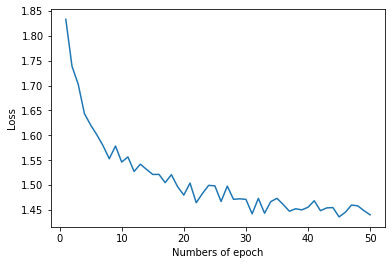

Plot test accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Test Accuracy: [0.3985, 0.4399, 0.4769, 0.4959, 0.5032, 0.4952, 0.5184, 0.5343, 0.544, 0.5283, 0.5557, 0.5395, 0.5568, 0.5544, 0.5323, 0.5442, 0.5591, 0.5607, 0.5614, 0.5708, 0.5714, 0.5476, 0.5618, 0.5578, 0.5828, 0.5691, 0.5647, 0.5639, 0.5841, 0.573, 0.5809, 0.5864, 0.564, 0.5911, 0.5737, 0.5932, 0.5891, 0.5749, 0.5953, 0.5856, 0.5968, 0.5841, 0.5665, 0.5812, 0.5917, 0.595, 0.5923, 0.5932, 0.5934, 0.5778]


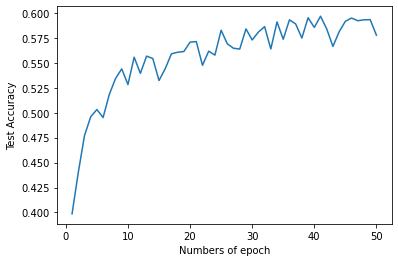

Plot train accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Train Accuracy: [0.33084, 0.36404, 0.38684, 0.40206, 0.41418, 0.40778, 0.42692, 0.43768, 0.44798, 0.43918, 0.44248, 0.4554, 0.45406, 0.45198, 0.43706, 0.45666, 0.45778, 0.46564, 0.46992, 0.46382, 0.46728, 0.46032, 0.4703, 0.4678, 0.48114, 0.47978, 0.46558, 0.47688, 0.47084, 0.47426, 0.48054, 0.48, 0.4701, 0.48906, 0.47676, 0.48784, 0.4913, 0.47806, 0.49494, 0.48766, 0.49026, 0.48766, 0.46912, 0.48486, 0.48736, 0.49696, 0.4926, 0.49014, 0.48882, 0.48576]


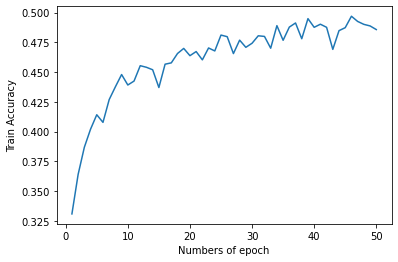

In [13]:
#####################################
# 1. Loading and normalizing CIFAR10
#####################################

import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 4

transform = transforms.Compose(
    [transforms.ToTensor(),    #numpy->Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #將數值正規劃到-1~1之間

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    #Download train dataset 50000
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)     #Download test dataset 10000

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Let us show some of the training images, for fun.

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5      # unnormalize
    npimg = img.numpy()      # tensor -> numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     #改變通道順序


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

##########################################
# 2. Define a Convolution Neural Network
##########################################

import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #input=3, output=6, kernal size=5(5*5)
        self.pool = nn.MaxPool2d(2, 2)  #kernal size=2(2*2), stride=2
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5*16=conv2+pool後的大小
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


##########################################
# 3. Define a Loss function and optimizer
##########################################

import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

########################
# 4. Train the network
########################

EPOCHS = 50
#curve of loss:
epoch_=[]
loss_=[]
epoch_change = False

#test accuracy:
test_acc=[]

#test accuracy:
train_acc=[]

#data augmentation
transform = transforms.Compose(
    [transforms.RandomResizedCrop(32), transforms.RandomHorizontalFlip(),
     transforms.ToTensor(),    #numpy->Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))]) 

for epoch in range(EPOCHS):  # loop over the dataset multiple times ＃跑完全部data是一個epoch,一次跑batch_size張data

    trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    #Download train dataset 50000
                                        download=True, transform=transform)

    trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):    # i=第幾批data
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs) #train
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches #每2000批印出來
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            
            #curve of loss
            if epoch_change == False and epoch_ != []:
                epoch_.pop()
                epoch_.append(epoch+1)
                loss_.pop()
                loss_.append(running_loss / 2000)
            else:
                epoch_.append(epoch+1)
                loss_.append(running_loss / 2000)
                epoch_change = False

            running_loss = 0.0
            
    epoch_change = True
    
    
    
    #######################################
    # 5. Test the network on the test data
    #######################################

    dataiter = iter(testloader)
    images, labels = dataiter.next()

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)


    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc.append(correct / total)


    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            if labels.shape[0] == BATCH_SIZE:   #若BATCH_SIZE除10000除不盡, 則忽略最後一筆
                for i in range(BATCH_SIZE):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1

    
    #########################################
    # 6. Test the network on the train data
    #########################################
    
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    train_acc.append(correct / total)
    
print('Finished Training')

#curve of loss:
from matplotlib import pyplot as plt
print("\nPlot curve of loss:")
plt.plot(epoch_,loss_) 
print("Epoch:",epoch_)
print("Loss:",loss_)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Loss")
plt.show()

#test accuracy:
print("Plot test accuracy:")
plt.plot(epoch_,test_acc) 
print("Epoch:",epoch_)
print("Test Accuracy:",test_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Test Accuracy")
plt.show()

#train accuracy:
print("Plot train accuracy:")
plt.plot(epoch_,train_acc) 
print("Epoch:",epoch_)
print("Train Accuracy:",train_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Train Accuracy")
plt.show()

# Part 8: Change the loss function

8. Change the loss function from Cross Entropy to Mean Squared Error and report the effect.

Files already downloaded and verified
Files already downloaded and verified
[1,  2000] loss: 0.091
[1,  4000] loss: 0.089
[1,  6000] loss: 0.088
[1,  8000] loss: 0.086
[1, 10000] loss: 0.084
[1, 12000] loss: 0.083
[2,  2000] loss: 0.081
[2,  4000] loss: 0.081
[2,  6000] loss: 0.080
[2,  8000] loss: 0.079
[2, 10000] loss: 0.078
[2, 12000] loss: 0.078
[3,  2000] loss: 0.076
[3,  4000] loss: 0.076
[3,  6000] loss: 0.075
[3,  8000] loss: 0.075
[3, 10000] loss: 0.074
[3, 12000] loss: 0.074
[4,  2000] loss: 0.073
[4,  4000] loss: 0.073
[4,  6000] loss: 0.073
[4,  8000] loss: 0.072
[4, 10000] loss: 0.072
[4, 12000] loss: 0.072
[5,  2000] loss: 0.071
[5,  4000] loss: 0.070
[5,  6000] loss: 0.070
[5,  8000] loss: 0.069
[5, 10000] loss: 0.069
[5, 12000] loss: 0.069
[6,  2000] loss: 0.068
[6,  4000] loss: 0.068
[6,  6000] loss: 0.068
[6,  8000] loss: 0.067
[6, 10000] loss: 0.067
[6, 12000] loss: 0.066
[7,  2000] loss: 0.066
[7,  4000] loss: 0.065
[7,  6000] loss: 0.065
[7,  8000] loss: 0.065
[7, 

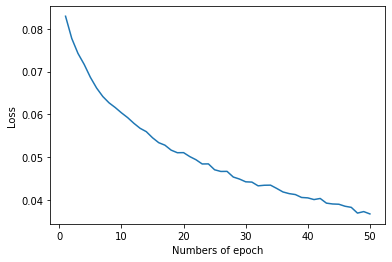

Plot test accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Test Accuracy: [0.318, 0.3774, 0.4247, 0.4518, 0.4774, 0.4863, 0.5086, 0.5237, 0.535, 0.5509, 0.5541, 0.5639, 0.563, 0.5779, 0.5885, 0.5966, 0.5955, 0.5923, 0.6114, 0.6134, 0.6162, 0.6147, 0.6159, 0.6163, 0.6228, 0.6354, 0.6296, 0.6344, 0.6372, 0.6386, 0.6367, 0.6433, 0.6438, 0.6455, 0.6438, 0.6481, 0.6417, 0.6439, 0.6515, 0.6489, 0.6534, 0.6524, 0.652, 0.6472, 0.6538, 0.6533, 0.6542, 0.6502, 0.6408, 0.6483]


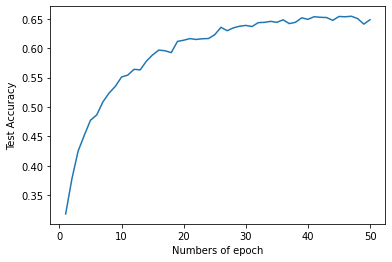

Plot train accuracy:
Epoch: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]
Train Accuracy: [0.31586, 0.3717, 0.42724, 0.45638, 0.48856, 0.49992, 0.51978, 0.53968, 0.5525, 0.5682, 0.57168, 0.58264, 0.58576, 0.60196, 0.6149, 0.62312, 0.6232, 0.62742, 0.64608, 0.65068, 0.65526, 0.657, 0.66412, 0.65908, 0.66916, 0.68522, 0.68956, 0.69312, 0.69638, 0.69956, 0.70488, 0.71454, 0.71612, 0.71722, 0.72288, 0.72922, 0.72466, 0.73124, 0.7386, 0.73876, 0.7485, 0.75128, 0.75482, 0.75504, 0.76158, 0.7664, 0.76592, 0.7675, 0.75832, 0.77072]


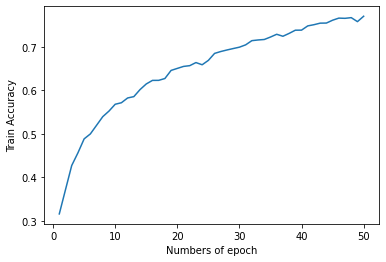

In [3]:
######################################
# 1. Loading and normalizing CIFAR10
######################################

import torch
import torchvision
import torchvision.transforms as transforms

BATCH_SIZE = 4

transform = transforms.Compose(
    [transforms.ToTensor(),    #numpy->Tensor
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])   #將數值正規劃到-1~1之間

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,    #Download train dataset 50000
                                        download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)     #Download test dataset 10000

testloader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# Let us show some of the training images, for fun.

import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5      # unnormalize
    npimg = img.numpy()      # tensor -> numpy
    plt.imshow(np.transpose(npimg, (1, 2, 0)))     #改變通道順序


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

#########################################
# 2. Define a Convolution Neural Network
#########################################

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) #input=3, output=6, kernal size=5(5*5)
        self.pool = nn.MaxPool2d(2, 2)  #kernal size=2(2*2), stride=2
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # 5*5*16=conv2+pool後的大小
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):

        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()


##########################################
# 3. Define a Loss function and optimizer
##########################################

import torch.optim as optim

criterion = nn.MSELoss()
# criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#######################
# 4. Train the network
#######################

EPOCHS = 50
#curve of loss:
epoch_=[]
loss_=[]
epoch_change = False

#test accuracy:
test_acc=[]

#test accuracy:
train_acc=[]

for epoch in range(EPOCHS):  # loop over the dataset multiple times ＃跑完全部data是一個epoch,一次跑batch_size張data

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):    # i=第幾批data
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()
        
        labels_transform = torch.reshape(labels, (labels.size(0), 1))
        # produce one-hot from labels
        labels_onehot = torch.zeros([BATCH_SIZE, 10])# 10=nums of class
        labels_onehot = labels_onehot.scatter_(1, labels_transform,1)
        
        # forward + backward + optimize
        outputs = net(inputs) #train
    
        loss = criterion(outputs, labels_onehot)     
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches #每2000批印出來
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            
            #curve of loss
            if epoch_change == False and epoch_ != []:
                epoch_.pop()
                epoch_.append(epoch+1)
                loss_.pop()
                loss_.append(running_loss / 2000)
            else:
                epoch_.append(epoch+1)
                loss_.append(running_loss / 2000)
                epoch_change = False

            running_loss = 0.0
            
    epoch_change = True
    
    
    ########################################
    # 5. Test the network on the test data
    ########################################

    dataiter = iter(testloader)
    images, labels = dataiter.next()

    outputs = net(images)
    _, predicted = torch.max(outputs, 1)


    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_acc.append(correct / total)


    class_correct = list(0. for i in range(10))
    class_total = list(0. for i in range(10))
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            c = (predicted == labels).squeeze()
            if labels.shape[0] == BATCH_SIZE:   #若BATCH_SIZE除10000除不盡, 則忽略最後一筆
                for i in range(BATCH_SIZE):
                    label = labels[i]
                    class_correct[label] += c[i].item()
                    class_total[label] += 1

    
    #########################################
    # 6. Test the network on the train data
    #########################################
    
    dataiter = iter(trainloader)
    images, labels = dataiter.next()
    outputs = net(images)
    _, predicted = torch.max(outputs, 1)
    correct = 0
    total = 0
    with torch.no_grad():
        for data in trainloader:
            images, labels = data
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    train_acc.append(correct / total)
    
print('Finished Training')

#curve of loss:
from matplotlib import pyplot as plt
print("\nPlot curve of loss:")
plt.plot(epoch_,loss_) 
print("Epoch:",epoch_)
print("Loss:",loss_)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Loss")
plt.show()

#test accuracy:
print("Plot test accuracy:")
plt.plot(epoch_,test_acc) 
print("Epoch:",epoch_)
print("Test Accuracy:",test_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Test Accuracy")
plt.show()

#train accuracy:
print("Plot train accuracy:")
plt.plot(epoch_,train_acc) 
print("Epoch:",epoch_)
print("Train Accuracy:",train_acc)
plt.xlabel("Numbers of epoch") 
plt.ylabel("Train Accuracy")
plt.show()